## TL;DR

Simple Neural Network from scratch, inspired by [Denny Britz's code](https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb) and Coursera's Deep Learning Specialization. 

Generate a dataset with 200 random data points, each data point falls into only one of two classes. Use a 3 layer neural network to predict the class of each data point. Experiment with different number of hidden units, different values of learning rate and minibatch gradient descent. 

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets 
import sklearn.linear_model 
import matplotlib
import math

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generating dataset

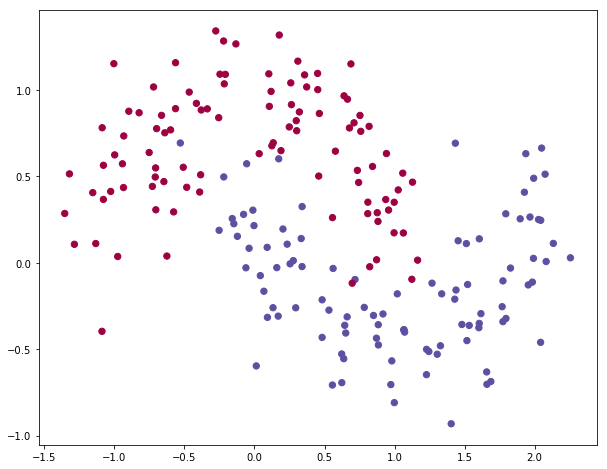

In [74]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise = 0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

## Logistic regression

In [75]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [76]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

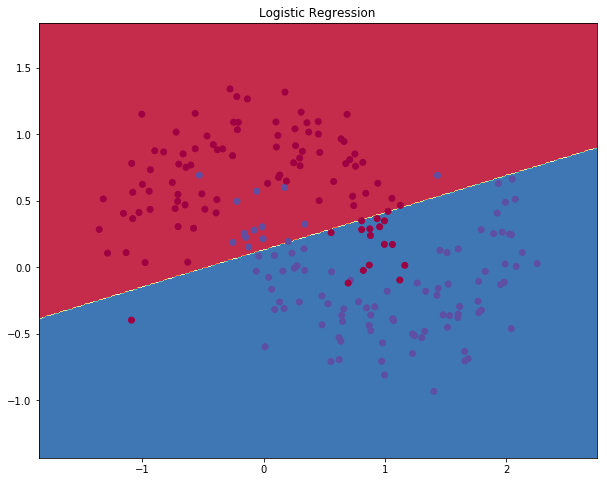

In [77]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

## Training a Neural Network 

In [78]:
# shapes of dataset
print("shape of X is",X.shape)
print("shape of y is",y.shape)

shape of X is (200, 2)
shape of y is (200,)


In [79]:
m = X.shape[0]  #number of training examples

reg_lambda = 0.01

In [80]:
def forward_prop(parameters,X):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'],parameters['b2']
    
    # forward prop 
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    a2 = exp_scores/ np.sum(exp_scores, axis = 1, keepdims = True)
    
    assert(a2.shape[0] == X.shape[0])
    
    return z1, a1, z2, a2

In [81]:
def compute_loss(a2,y,parameters):
    W1, W2 = parameters['W1'], parameters['W2']
    #calculating loss 
    loss = -np.sum(np.log(a2[range(a2.shape[0]),y]))
    
    # add regularization term to loss 
    loss += (reg_lambda/2)*(np.sum(np.square(W1)) + np.sum(np.square(W2)))
    loss /= a2.shape[0]
    
    return loss 

# forgot to divide by lambda for regularization term 

In [82]:
def predict(parameters,X):
    z1, a1, z2, a2 = forward_prop(parameters,X)
    prediction = np.argmax(a2, axis = 1)
    return prediction

In [83]:
def build_model(hidden_units = 3, lr = 0.01, num_passes = 20000, print_loss = False):
    
    n0 = X.shape[1]
    n1 = hidden_units
    n2 = 2
    
    # initialize parameters 
    np.random.seed(0)
    W1 = np.random.randn(n0,n1) / np.sqrt(n0)
    b1 = np.zeros((1, n1))
    W2 = np.random.randn(n1,n2) / np.sqrt(n1)
    b2 = np.zeros((1, n2))
    
    parameters = {'W1': W1,'b1': b1, 'W2': W2, 'b2': b2}
    
    for i in range(0, num_passes):
    
        # my code
        z1, a1, z2, a2 = forward_prop(parameters,X)
        
        cost = compute_loss(a2,y,parameters)

        #back prop
        delta3 = a2
        delta3[range(m), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -lr * dW1
        b1 += -lr * db1
        W2 += -lr * dW2
        b2 += -lr * db2

        # Assign new parameters to the model
        parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Note: cannot calculate cost here, because a2 is calcualted using old values of w 
        
        W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
        
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, cost ))

    return parameters 

In [84]:
parameters = build_model(hidden_units = 3, lr = 0.01, print_loss = True)

Loss after iteration 0: 0.583940
Loss after iteration 1000: 0.068948
Loss after iteration 2000: 0.068883
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


In [85]:
prediction = predict(parameters,X)

In [86]:
print("accuracy is %f" %(sum(prediction == y)*100/m))

accuracy is 97.500000


## Varying the hidden units 

In [87]:
hidden_units = [1,2,4,5]
for element in hidden_units: 
    parameters = build_model(hidden_units = element, lr = 0.01, print_loss = False)
    prediction = predict(parameters,X)
    print("accuracy for %d hidden unit(s) is %f" %(element, sum(prediction == y)*100/m))

accuracy for 1 hidden unit(s) is 86.500000
accuracy for 2 hidden unit(s) is 87.000000
accuracy for 4 hidden unit(s) is 99.000000
accuracy for 5 hidden unit(s) is 99.000000


## Varying the learning rate

In [90]:
lrates = [0.1,0.001,0.0001]
for element in lrates: 
    parameters = build_model(hidden_units = 3, lr = element, print_loss = False)
    prediction = predict(parameters,X)
    print("accuracy for %.4f learning rate is %f" %(element, sum(prediction == y)*100/m))

accuracy for 0.1000 learning rate is 85.000000
accuracy for 0.0010 learning rate is 97.500000
accuracy for 0.0001 learning rate is 97.500000


## Creating minibatches 

In [91]:
# goal: create a list called minibatches, containing many minibatch tuples 
def create_random_minibatches(X,Y,bs):
    minibatches = []
    shuffle = np.random.permutation(X.shape[0])
    X_shuffled = X[shuffle,:]
    Y_shuffled = Y[shuffle]
    
    complete_batches = math.floor(X.shape[0]/bs)
    
    for k in range(0,complete_batches):
        minibatch_X = X_shuffled[bs*k:bs*(k+1),:]
        minibatch_Y = Y_shuffled[bs*k:bs*(k+1)]
        minibatches.append((minibatch_X,minibatch_Y))
    
    if X.shape[0]%bs != 0:
        final_minibatchX = X_shuffled[bs*complete_batches:,:]
        final_minibatchY = Y_shuffled[bs*complete_batches]
        minibatches.append((final_minibatchX,final_minibatchY))
    
    return minibatches

In [92]:
# test create_random_minibatches on a sample set
n = 11
one_array = np.array([np.arange(n)])
testX = np.concatenate((one_array,one_array),axis = 0).T
testY = np.arange(n)

In [93]:
test_minibatches = create_random_minibatches(testX,testY,2)
test_minibatches[0]

(array([[2, 2],
        [4, 4]]), array([2, 4]))

In [94]:
test_minibatches[-1]

(array([[8, 8]]), 8)

In [114]:
minibatches = create_random_minibatches(X,y,64)

In [115]:
#sanity checks 
print(len(minibatches) == math.floor(200/64) + 1)
print("minibatch[0] has length", len(minibatches[0]))
print("minibatch[0][0] has length", len(minibatches[0][0]))

True
minibatch[0] has length 2
minibatch[0][0] has length 64


In [116]:
def build_model_minibatch(hidden_units = 3, lr = 0.001, num_passes = 20000, print_loss = False):
    
    n0 = X.shape[1]
    n1 = hidden_units
    n2 = 2
    
    # initialize parameters 
    np.random.seed(0)
    W1 = np.random.randn(n0,n1) / np.sqrt(n0)
    b1 = np.zeros((1, n1))
    W2 = np.random.randn(n1,n2) / np.sqrt(n1)
    b2 = np.zeros((1, n2))
    
    parameters = {'W1': W1,'b1': b1, 'W2': W2, 'b2': b2}
    
    for i in range(0, num_passes):
        
        for minibatch in minibatches:
            
            (minibatchX, minibatchY) = minibatch
    
            z1, a1, z2, a2 = forward_prop(parameters,minibatchX)

            cost = compute_loss(a2,minibatchY,parameters)

            #back prop
            delta3 = a2
            delta3[range(a2.shape[0]), minibatchY] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(minibatchX.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

            # Gradient descent parameter update
            W1 += -lr * dW1
            b1 += -lr * db1
            W2 += -lr * dW2
            b2 += -lr * db2

            # Assign new parameters to the model
            parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

            # Note: cannot calculate cost here, because a2 is calcualted using old values of w 

            W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']

        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, cost ))

    return parameters 

In [117]:
parameters = build_model_minibatch(hidden_units = 3, lr = 0.001, num_passes = 20000, print_loss = True)

Loss after iteration 0: 0.698973
Loss after iteration 1000: 1.578078
Loss after iteration 2000: 1.859080
Loss after iteration 3000: 1.900154
Loss after iteration 4000: 1.840962
Loss after iteration 5000: 1.643110
Loss after iteration 6000: 1.562059
Loss after iteration 7000: 1.521129
Loss after iteration 8000: 1.447105
Loss after iteration 9000: 1.371992
Loss after iteration 10000: 1.355591
Loss after iteration 11000: 1.345986
Loss after iteration 12000: 1.339197
Loss after iteration 13000: 1.333973
Loss after iteration 14000: 1.329772
Loss after iteration 15000: 1.326323
Loss after iteration 16000: 1.323463
Loss after iteration 17000: 1.321079
Loss after iteration 18000: 1.319087
Loss after iteration 19000: 1.317420


In [118]:
# note: loss after iteration is higher with mini batch gradient descent, maybe... 
# because our dataset is too small for it to work